# Herramienta de definición de aptitud agrícola 

La planificación y gestión sostenible de los territorios rurales son fundamentales para garantizar la seguridad alimentaria, promover el desarrollo agrícola y enfrentar los desafíos del cambio climático. Es en este contexto que la evaluación de tierras toma un papel 
relevante en la planificación de su uso y propone como objetivos sistemas de producción que sean apropiados a su contexto, es decir, ambientalmente aceptables, socialmente  viables y sostenibles en el mediano y largo plazo. (Corrales et al., 2018) Para la evaluación  de tierras se han desarrollado diversas metodologías permitiendo identificar áreas con potencialidades y limitaciones específicas para actividades agropecuarias; las cuales, hacen uso de la integración de criterios biofísicos, socioeconómicos y ambientales.

El presente cuaderno busca presentar una aproximación a la aplicación de herramientas de procesamiento espacial en leguaje Python para la aplicación de una adapatación de la metodología de evaluación de aptitud agrícola de la UPRA del año 2018 en un caso de estudio que corresponde al municipio de Tunja.

**Instalación e importación de librerías necesarias para la preparación de la información**

In [3]:
!pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
  Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   -------- ------------------------------- 5.5/25.4 MB 37.2 MB/s eta 0:00:01
   --------------------------- ------------ 17.3/25.4 MB 47.3 MB/s eta 0:00:01
   ---------------------------------------- 25.4/25.4 MB 44.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
try:
    import pandas as pd
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import numpy as np
    import rasterio
    import scipy
    from shapely.geometry import Polygon, MultiPolygon
    from rasterio.plot import show
    print ("✔️ Las librerías fueron cargadas correctamente")
except Exception as e:
    print ("❌ Alguna de las librerías no fueron cargadas, por favor validar la instalación de las mismas: ", e)


✔️ Las librerías fueron cargadas correctamente


**Lectura de capas vectoriales y datos tipo Ráster**

Muchas de las capas que utilizaremos para el propósito del proyecto, fueron previamente procesadas con el ánimo de trabajar únicamente xon el parea correspondiente al municipio de Tunja; para consultar el desarrollo de los procesamientos relaizados profavor acceder al siguiente repositorio de GitHub: [GeoSpatial Operations](https://github.com/jerojast/GeospatialOperations/blob/eb45734ed8100da35a5414207151a321ab23afff/Taller2_Tunja.ipynb)

In [60]:
# Rutas de los archivos locales
suelo_path = r"Estudio_Suelos_Boyaca\suelos_tunja.shp"
ecosistemas_path = r"Ecosistemas\ecosistemas_tunja.shp"
frontera_path = r"Frontera_Agricola\frontera_tunja.shp"
limite_municipal_path = r"Limite_municipal\15001_tunja.shp"
areas_protegidas_path = r"AreasProtegidas\runap_tunja.shp"
zona_rural_path = r"POT\zon_rural_pot.shp"
drenajes_path = r"POT\drenajes.shp"
perim_urbano_path = r"POT\cc_perimetrourbano.shp"
uso_path = r"POT\cobertura_uso.shp"
relleno_path = r"POT\area_proyecto.shp"
protegidasCar_path = r"POT\areas_proteg_corpob.shp"
reservaF_path = r"POT\areas_proteg_min.shp"
forestalProt_path = r"POT\forestal_proteccion.shp"
lineaFerrea_path = r"POT\linea_ferrea.shp"
zonasRestauracion_path = r"POT\restauracion.shp"
usoPotencial_path = r"POT\uso_potencial.shp"
vias_path = r"POT\vias_regionales.shp"

# Cargar los archivos SHP en GeoDataFrames
try: 
    gdf_suelo = gpd.read_file(suelo_path)
    gdf_ecosistemas = gpd.read_file(ecosistemas_path)
    gdf_frontera = gpd.read_file(frontera_path)
    gdf_limite = gpd.read_file(limite_municipal_path)
    gdf_areas_protegidas = gpd.read_file(areas_protegidas_path)
    gdf_zona_rural = gpd.read_file(zona_rural_path)
    gdf_drenajes = gpd.read_file(drenajes_path)
    gdf_perim_urbano = gpd.read_file(perim_urbano_path)
    gdf_uso = gpd.read_file(uso_path)
    gdf_relleno = gpd.read_file(relleno_path)
    gdf_protegidas_car = gpd.read_file(protegidasCar_path)
    gdf_reservafp = gpd.read_file(reservaF_path)
    gdf_forestalProt = gpd.read_file(forestalProt_path)
    gdf_lineaFerrea = gpd.read_file(lineaFerrea_path)
    gdf_ZnRestauracion = gpd.read_file(zonasRestauracion_path)
    gdf_uso_potencial = gpd.read_file(usoPotencial_path)
    gdf_vias = gpd.read_file(vias_path)
   
    print("🗺️ Capas vectoriales cargadas correctamente.")

except Exception as e:
    print ("❌ Alguna de las capas no fueron cargadas, por favor validar la ruta ingresada: ", e)

🗺️ Capas vectoriales cargadas correctamente.


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 1590, 'height': 1524, 'count': 1, 'crs': CRS.from_wkt('LOCAL_CS["MAGNA_SIRGAS_Origen_Nacional",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(10.0, 0.0, 4950464.5,
       0.0, -10.0, 2175052.461), 'blockxsize': 1590, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


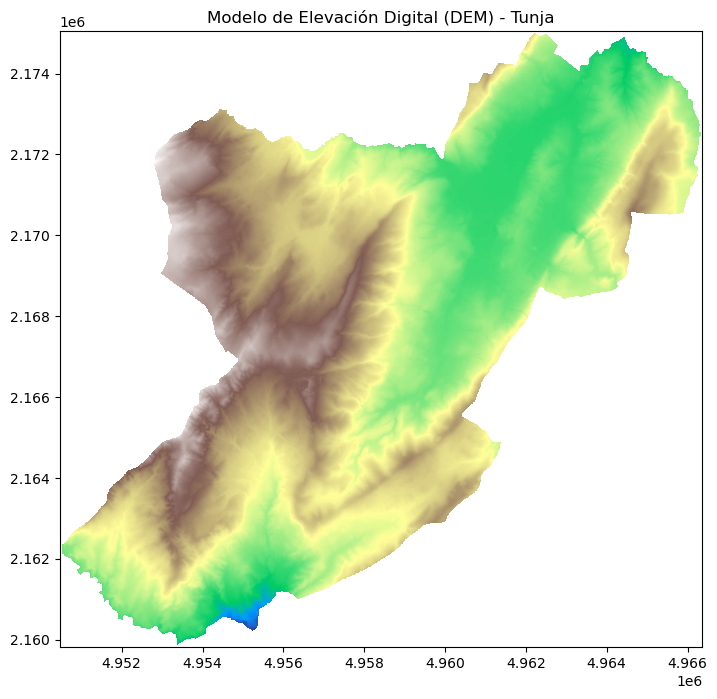

In [6]:
# Ruta del DEM
dem_path = r"DEM_Tunja\DEM.tif"

# Cargar del raster DEM
try:
    raster_dem = rasterio.open(dem_path)
    # Mostrar información del DEM
    print(raster_dem.profile)
    # Visualizar DEM
    plt.figure(figsize=(12, 8))
    plt.title("Modelo de Elevación Digital (DEM) - Tunja")
    show(raster_dem, cmap='terrain')
    plt.show()
except Exception as e:
    print ("❌ Alguna de las capas no fueron cargadas, por favor validar la ruta ingresada: ", e)


**Validación sistemas de referencia de capas vector**

En todo proyecto de procesamiento geoespacial es fundamental evaluar la unicidad de los sistemas de proyección, ello debido a que diferencias entre estos puede generar traslapes erróneos en las salidas gráficas, los procesamientos o incluso generar errores topológicos.

In [61]:
# Validar proyecciones
crs_suelo = print("Sistema de coordenadas Suelo:", gdf_suelo.crs)
crs_ecos = print("Sistema de coordenadas Ecosistemas:", gdf_ecosistemas.crs)
crs_frontera = print("Sistema de coordenadas Frontera:", gdf_frontera.crs)
crs_límite = print("Sistema de coordenadas Limite Municipal:", gdf_limite.crs)
crs_runap = print("Sistema de coordenadas Áreas Protegidas:", gdf_areas_protegidas.crs)
crs_rural = print("Sistema de coordenadas Zonficiación Rural:", gdf_zona_rural.crs)
crs_drenajes = print("Sistema de coordenadas Drenajes:", gdf_drenajes.crs)
crs_perim_urbano = print("Sistema de coordenadas Perímetro Urbano:", gdf_perim_urbano.crs)
crs_uso = print("Sistema de coordenadas Uso del Suelo:", gdf_uso.crs)
crs_relleno = print("Sistema de coordenadas relleno:", gdf_relleno.crs)
crs_protegidas_car = print("Sistema de coordenadas áreas protegidas CAR: ", gdf_areas_protegidas.crs)
crs_reservafp = print("Sistema de coordenadas Reserva FP:", gdf_reservafp.crs)
crs_forestalProt = print("Sistema de coordenadas Forestal Protegida:", gdf_forestalProt.crs)
crs_lineaFerrea = print("Sistema de coordenadas Línea Ferrea:", gdf_lineaFerrea.crs)
crs_ZnRestauracion = print("Sistema de coordenadas Zonas de Restauración:", gdf_ZnRestauracion.crs)
crs_uso_potencial = print("Sistema de coordenadas Uso Potencial:", gdf_uso_potencial.crs)
crs_vias = print("Sistema de coordenadas Vías:", gdf_vias.crs)

Sistema de coordenadas Suelo: EPSG:4326
Sistema de coordenadas Ecosistemas: EPSG:4326
Sistema de coordenadas Frontera: EPSG:4326
Sistema de coordenadas Limite Municipal: PROJCS["CTM12",GEOGCS["MAGNA-SIRGAS",DATUM["Marco_Geocentrico_Nacional_de_Referencia",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6686"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4],PARAMETER["central_meridian",-73],PARAMETER["scale_factor",0.9992],PARAMETER["false_easting",5000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Sistema de coordenadas Áreas Protegidas: EPSG:4326
Sistema de coordenadas Zonficiación Rural: EPSG:4326
Sistema de coordenadas Drenajes: EPSG:4326
Sistema de coordenadas Perímetro Urbano: EPSG:4326
Sistema de coordenadas Uso del Suelo: EPSG:4326
Sistema de coordenadas relleno: EPSG:4326
Sistema de co

**Ajuste de las proyecciones de las capas a EPSG:9377**

In [62]:
# Convertir todo a Origen Único Nacional EPSG:9377

proyecciones = [crs_suelo, crs_ecos, crs_frontera, crs_límite, crs_runap, crs_rural, crs_drenajes]

if any(proy != "EPSG:9377" for proy in proyecciones):
    gdf_suelo = gdf_suelo.to_crs(epsg=9377)
    gdf_ecosistemas = gdf_ecosistemas.to_crs(epsg=9377)
    gdf_frontera = gdf_frontera.to_crs(epsg=9377)
    gdf_limite = gdf_limite.to_crs(epsg=9377)
    gdf_areas_protegidas = gdf_areas_protegidas.to_crs(epsg=9377)
    gdf_zona_rural = gdf_zona_rural.to_crs(epsg=9377)
    gdf_drenajes = gdf_drenajes.to_crs(epsg=9377)
    gdf_perim_urbano = gdf_perim_urbano.to_crs(epsg=9377)
    gdf_uso = gdf_uso.to_crs(epsg=9377)
    gdf_relleno = gdf_relleno.to_crs(epsg=9377)
    gdf_protegidas_car = gdf_protegidas_car.to_crs(epsg=9377)
    gdf_reservafp = gdf_reservafp.to_crs(epsg=9377)
    gdf_forestalProt = gdf_forestalProt.to_crs(epsg=9377)
    gdf_lineaFerrea = gdf_lineaFerrea.to_crs(epsg=9377)
    gdf_ZnRestauracion = gdf_ZnRestauracion.to_crs(epsg=9377)
    gdf_uso_potencial = gdf_uso_potencial.to_crs(epsg=9377)
    gdf_vias = gdf_vias.to_crs(epsg=9377)
    print("Las capas fueron reproyectadas a EPSG:9377")
else:
    print("Las capas ya están en la proyección EPSG:9377")
    


Las capas fueron reproyectadas a EPSG:9377


Cómo deseamos evaluar la aptitud agrícola en función de las limitantes y restricciones ambientales, es decir, definir qué áreas son útiles para proyectos productivos en el nivel rural del municipio de Tunja. Para ello, iniciaremos con definiendo los límites del área a evaluar.

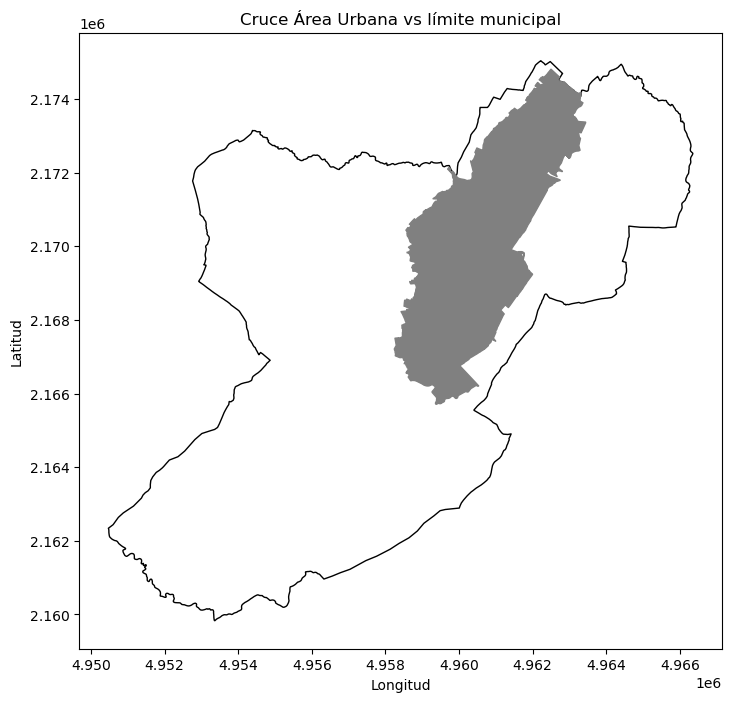

In [9]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Plot límite municipal
gdf_limite.plot(ax=ax, color='none', edgecolor='black', label='Límite Municipio de Tunja')

# Plot zona urbana
gdf_perim_urbano.plot(ax=ax, color='gray', edgecolor='gray', label='Área Urbana definida en POT de Tunja')

# Añadir leyenda y otros detalles al gráfico
ax.set_title('Cruce Área Urbana vs límite municipal')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()


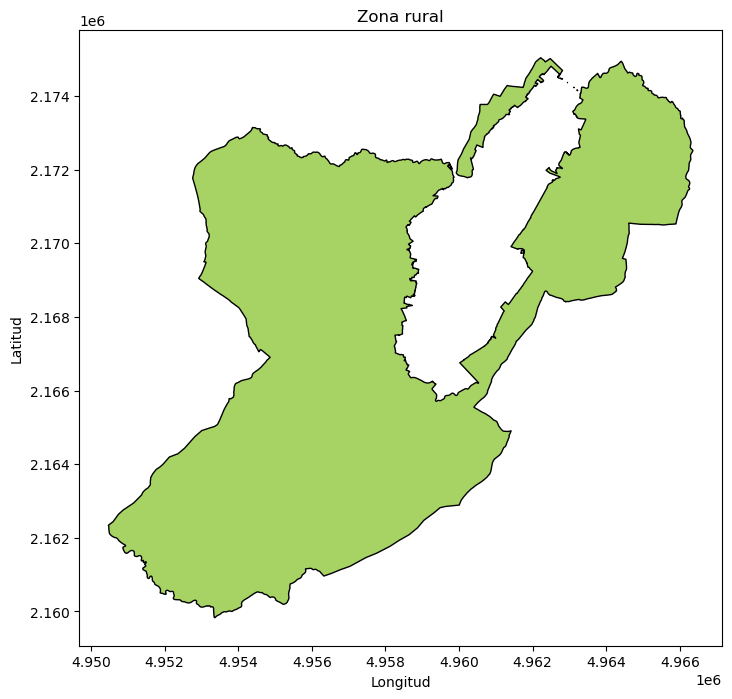

In [10]:
# Extraemos la sección que no está definida como zona urbana
gdf_zona_rural = gpd.overlay(gdf_limite, gdf_perim_urbano, how="difference")

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Plot límite municipal
gdf_zona_rural.plot(ax=ax, color='#a6d363', edgecolor='black', label='Zona rural')

# Añadir leyenda y otros detalles al gráfico
ax.set_title('Zona rural')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()


Ahora validaremos el cruce con las capas que representan zonas de restricción para la producción agrícola. Para ello inicialmente evaluaremos las zonas que deben generarse áreas pues su geometría es de tipo lineal. 

In [11]:
#Buffers de capas vectoriales lineales
gdf_vias['buffer_13m'] = gdf_vias.geometry.buffer(13) #Ancho promedio de vía
gdf_drenajes['buffer_30m'] = gdf_drenajes.geometry.buffer(30) #Ronda Hídrica Dec 2811 de 1974
gdf_lineaFerrea['buffer_20m'] = gdf_lineaFerrea.geometry.buffer(20) #Zonas de línea férrea
gdf_relleno['buffer_500m'] = gdf_relleno.geometry.buffer(500) #Zonas alejadas del relleno sanitario

#Seteamos las columnas buffer como las geometrías a usar
gdf_relleno.set_geometry('buffer_500m')
gdf_vias.set_geometry('buffer_13m') 
gdf_drenajes.set_geometry('buffer_30m') 
gdf_lineaFerrea.set_geometry('buffer_20m')

#Clip de capas
gdf_vias = gpd.clip(gdf_vias, gdf_zona_rural)
gdf_drenajes = gpd.clip(gdf_drenajes, gdf_zona_rural)
gdf_lineaFerrea = gpd.clip(gdf_lineaFerrea, gdf_zona_rural)
gdf_relleno = gpd.clip(gdf_relleno, gdf_zona_rural)

In [12]:
gdf_relleno['geometry'] = gdf_relleno['buffer_500m']
gdf_vias['geometry'] = gdf_vias['buffer_13m']
gdf_drenajes['geometry'] = gdf_drenajes['buffer_30m']
gdf_lineaFerrea['geometry'] = gdf_lineaFerrea['buffer_20m']

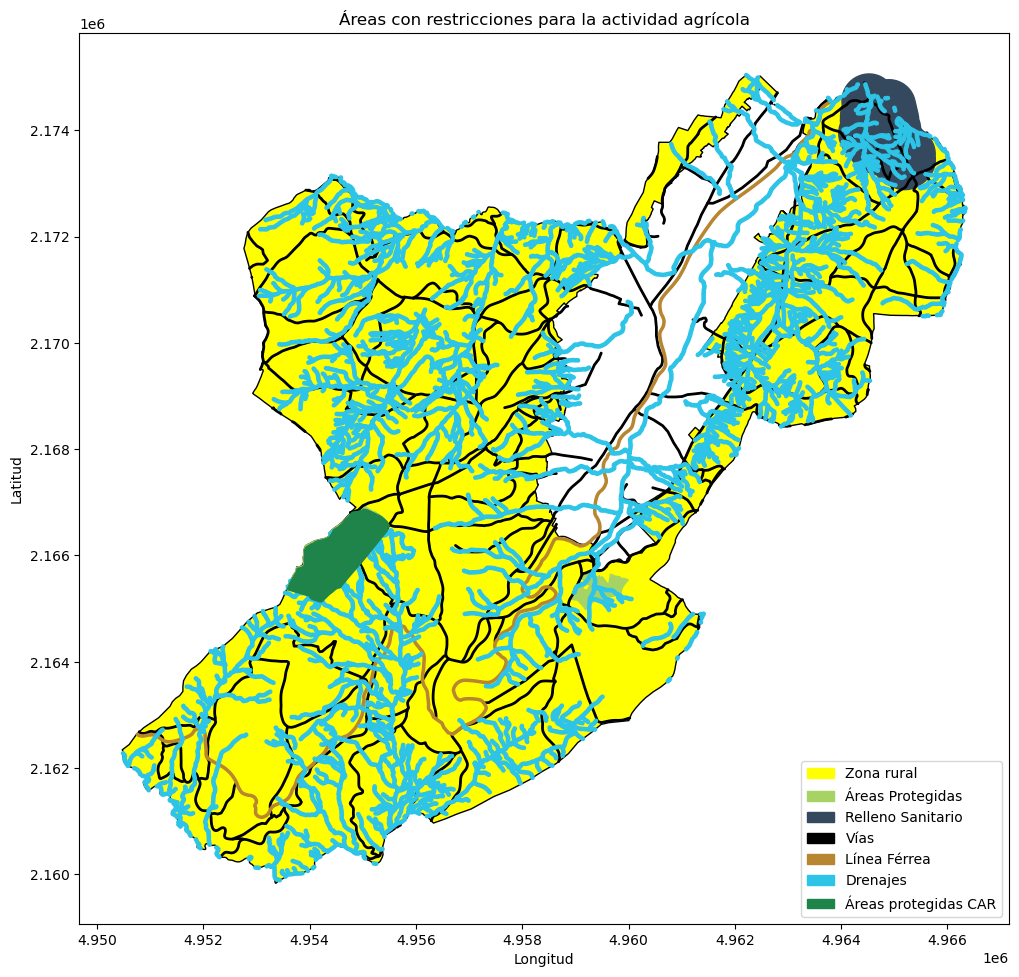

In [13]:
import matplotlib.patches as mpatches # Para crear elementos de leyenda personalizados

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 12))

# Plot límite municipal
gdf_zona_rural.plot(ax=ax, color='yellow', edgecolor='black', label='Zona rural')
# Plot runap
gdf_areas_protegidas.plot(ax=ax, color='#a6d363', edgecolor='#a6d363', label='Áreas Protegidas')
# Plot Relleno
gdf_relleno.plot(ax=ax, color='#34495e', edgecolor='#34495e', label='Relleno Sanitario')
# Plot vías
gdf_vias.plot(ax=ax, color='black', edgecolor='black', label='vías')
# Plot línea férrea
gdf_lineaFerrea.plot(ax=ax, color='#b88630', edgecolor='#b88630', label='Línea Férrea')
# Plot Drenajes
gdf_drenajes.plot(ax=ax, color='#2dc4e8', edgecolor='#2dc4e8', label='Drenajes')
#Plot Áreas Protegidas Corpoboyacá
gdf_protegidas_car.plot(ax=ax, color='#1e8449', edgecolor='#1e8449', label='Áreas protegidas CAR')


# Crear objetos temporales para la leyenda
proxy_zona_rural     = mpatches.Patch(color='yellow', label='Zona rural')
proxy_areas_protegidas = mpatches.Patch(color='#a6d363', label='Áreas Protegidas')
proxy_relleno         = mpatches.Patch(color='#34495e', label='Relleno Sanitario')
proxy_vias            = mpatches.Patch(color='black', label='Vías')
proxy_lineaFerrea     = mpatches.Patch(color='#b88630', label='Línea Férrea')
proxy_drenajes        = mpatches.Patch(color='#2dc4e8', label='Drenajes')
proxy_protegidas_car  = mpatches.Patch(color='#1e8449', label='Áreas protegidas CAR')

# Crear la lista de objetos y agregar la leyenda
legend_handles = [
    proxy_zona_rural,
    proxy_areas_protegidas,
    proxy_relleno,
    proxy_vias,
    proxy_lineaFerrea,
    proxy_drenajes,
    proxy_protegidas_car
]

# Añadir leyenda
ax.legend(handles=legend_handles, loc='lower right')
ax.set_title('Áreas con restricciones para la actividad agrícola')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

Retiraremos las áreas con restricciones para la actividad agrícola del polígono principal de área útil:

In [14]:
#Creamos el geodataframe restricciones con base en las capas de restricción
gdf_Restricciones = pd.concat([gdf_areas_protegidas, 
                               gdf_relleno,
                               gdf_vias,
                               gdf_lineaFerrea,
                               gdf_drenajes,
                               gdf_protegidas_car], ignore_index=True)
gdf_Restricciones = gpd.GeoDataFrame(gdf_Restricciones, crs=gdf_zona_rural.crs)

In [15]:
#Agrupamos las geometrías de las restricciones en un solo registro
gdf_Restricciones = gdf_Restricciones.dissolve() #  Da facilidad de trabajar con un solo registro a la hora de hacer el clip

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\3144955955.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right')
C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\3144955955.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower right')


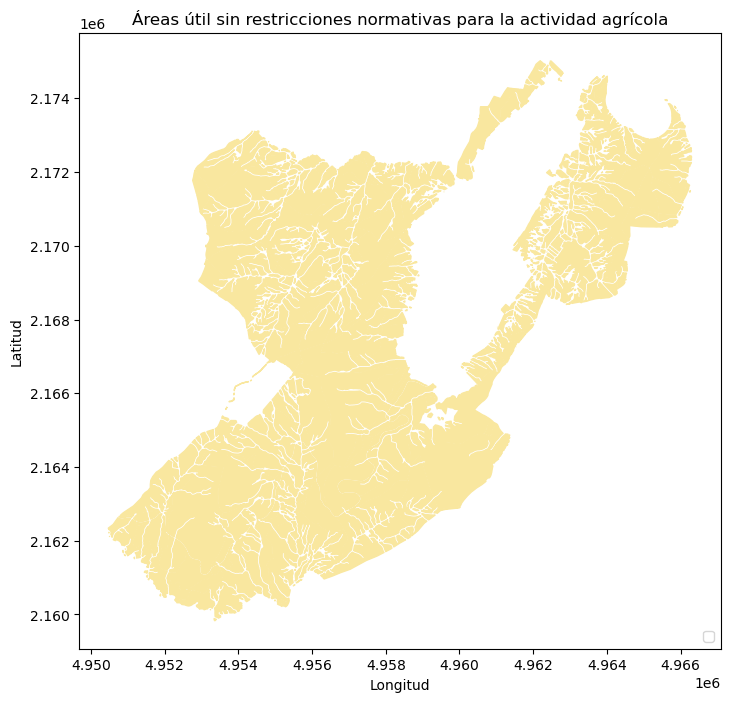

In [16]:
gdf_znUtil_restricciones = gpd.overlay(gdf_zona_rural, gdf_Restricciones, how="difference")

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Plot límite municipal
gdf_znUtil_restricciones.plot(ax=ax, color='#f9e79f', edgecolor='#f9e79f', label='Zona rural')

# Añadir leyenda manualmente con las entradas definidas
ax.legend(loc='lower right')
ax.set_title('Áreas útil sin restricciones normativas para la actividad agrícola')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

Una de las restricciones adicionales, la vemos en el Decreto 3600 de 2007 en el numeral 2 del artículo 21 estableció como una de las condiciones para el otorgamiento de licencias de parcelación y construcción en suelo rural y rural suburbano la conservación y mantenimiento de las masas arbóreas, independiente que sean naturales o plantadas, y forestales en suelos con pendientes superiores a los 45 grados; en este sentido, es de relevancia contemplar aquellas áreas en las que se cumple este criterio y definirla a su vez como área de restricción.

In [17]:
raster_dem.res

(10.0, 10.0)

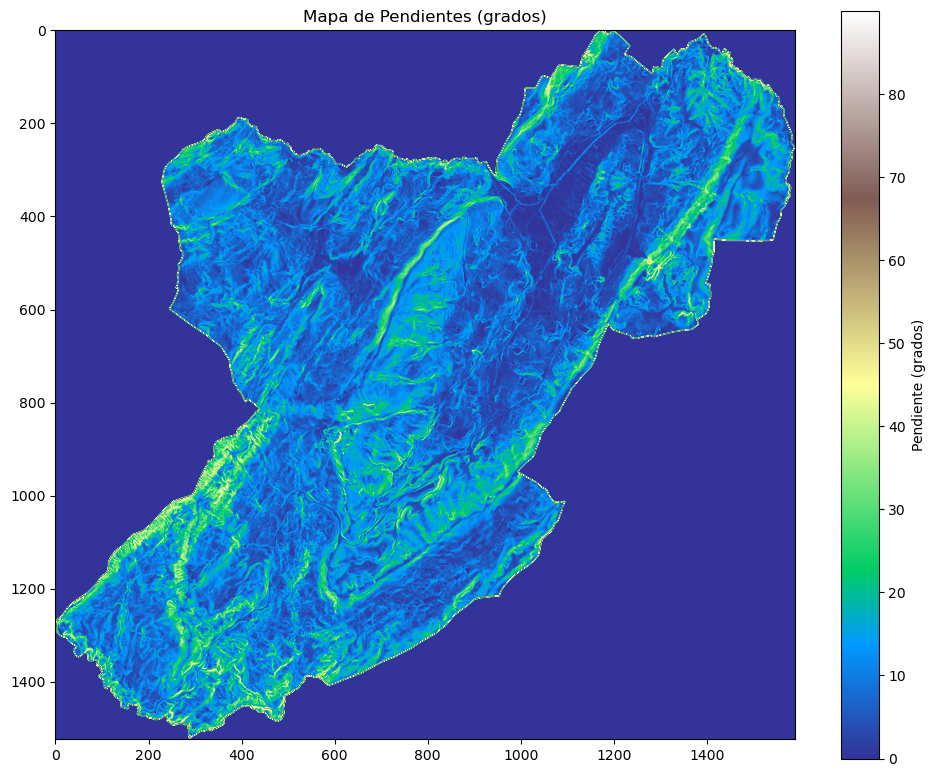

In [18]:
def calcular_pendiente(dem, pixel_size):
    """
    Calcula la pendiente en grados a partir de un array de elevaciones (DEM)
    usando el método del gradiente de NumPy.

    Parámetros:
      - dem: Array 2D con los valores de elevación.
      - pixel_size: Tamaño del píxel (asumido cuadrado) en las unidades del DEM.
    
    Retorna:
      - slope_degrees: Array 2D con la pendiente en grados.
    """
    # Calcular la derivada en x e y
    dz_dy, dz_dx = np.gradient(dem, pixel_size, pixel_size)
    # Calcular la pendiente en radianes
    slope_rad = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))
    # Convertir a grados
    slope_degrees = np.degrees(slope_rad)
    return slope_degrees


# Leer el DEM y obtener la resolución de píxeles
pendiente = raster_dem.read(1)  # Leer la primera banda
profile = raster_dem.profile
# Asumimos que los píxeles son cuadrados y usamos la resolución en x
pixel_size = raster_dem.res

# Calcular la pendiente en grados
slope_degrees = calcular_pendiente(pendiente, 10)

# Visualizar la pendiente en grados y la clasificación
plt.figure(figsize=(10, 8))

plt.imshow(slope_degrees, cmap='terrain')
plt.colorbar(label='Pendiente (grados)')
plt.title('Mapa de Pendientes (grados)')
plt.tight_layout()
plt.show()


# Guardar la pendiente en un archivo raster

# Actualiza el perfil para el nuevo raster
profile.update({
    'driver': 'GTiff',         # Formato de salida
    'height': slope_degrees.shape[0],     # Número de filas
    'width': slope_degrees.shape[1],      # Número de columnas
    'count': 1,                  # Número de bandas (1 para un raster de una sola banda)
    'dtype': 'int16'             # Tipo de dato (ajústalo según corresponda a tus datos)
})

# Ruta de salida del raster
output_path = "Pendientes.tif"

# Escribe el raster en disco
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(slope_degrees, 1)  # Escribe en la banda 1




In [19]:
from rasterio.features import shapes

# Crear una máscara del array para extraer solo la categoría 4 
mask_45 = slope_degrees >= 45

# Extraemos las geometrías con rasterio.features.shapes
# La función devuelve un iterador de (geometría, valor)
results = (
    {'properties': {'value': v}, 'geometry': s}
    for s, v in shapes(slope_degrees, mask=mask_45, transform=profile['transform'])
    if v >= 45  # filtra solo las geometrías de la categoría 4
)

# Convertimos el iterador a una lista (cada elemento es un diccionario GeoJSON)
geoms = list(results)

# Creamos un GeoDataFrame a partir de estas características
gdf_pendientes = gpd.GeoDataFrame.from_features(geoms, crs=profile['crs'])

# Opcional: Guardar la capa vectorial en un archivo shapefile
#gdf_category4.to_file("categoria4_vector.shp")

print("Se extrajeron", len(gdf_pendientes), "polígonos para pendientes iguales o mayores a 45°.")


Se extrajeron 5808 polígonos para pendientes iguales o mayores a 45°.


C:\Users\Esteban Rojas\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


Text(116.68757222965344, 0.5, 'Latitud')

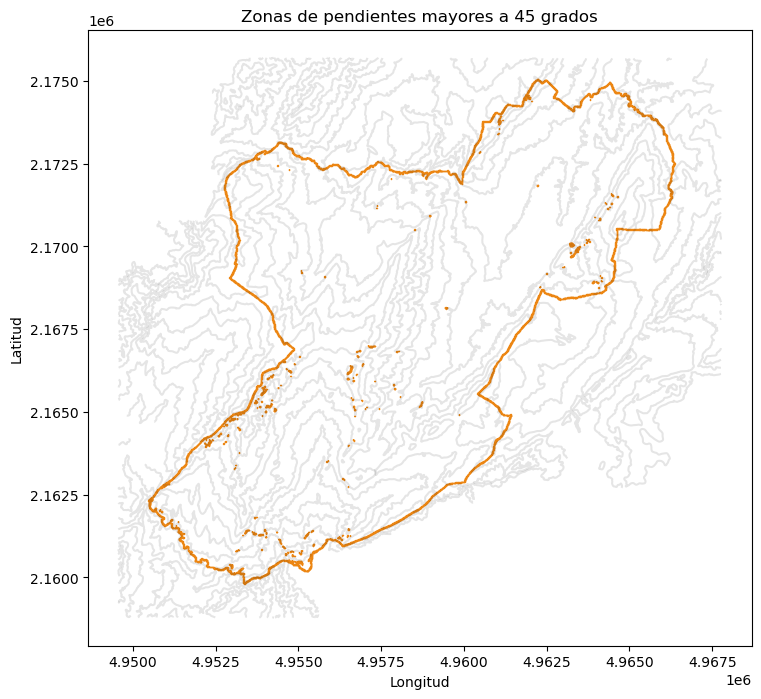

In [20]:
# Visualizar las zonas de pendientes mayores a 45 grados

curvas_path = r"POT\curva_nivel.shp"
gdf_curvas = gpd.read_file(curvas_path)
gdf_curvas = gdf_curvas.to_crs(epsg=9377)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Plot áreas con pendientes mayores a 45°
gdf_pendientes.plot(ax=ax, color='#ec8613', edgecolor='#ec8613', label='Zonas de pendientes mayores a 45 grados')

# Plot curvas de nivel
gdf_curvas.plot(ax=ax, color='black', alpha=0.1)

# Añadir leyenda manualmente con las entradas definidas
ax.set_title('Zonas de pendientes mayores a 45 grados')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

Teniendo los pológonos de las áreas con pendientes superiores a 45°, procederemos a definir ahora sí el área útil sin restricciones técnicas ni normativas.

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\406225796.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:9377
Right CRS: LOCAL_CS["MAGNA_SIRGAS_Origen_Nacional",UNIT["metr ...

  gdf_znUtil_restricciones = gpd.overlay(gdf_znUtil_restricciones, gdf_pendientes, how="difference")
C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\406225796.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 889 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_znUtil_restricciones = gpd.overlay(gdf_znUtil_restricciones, gdf_pendientes, how="difference")
C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\406225796.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermedia

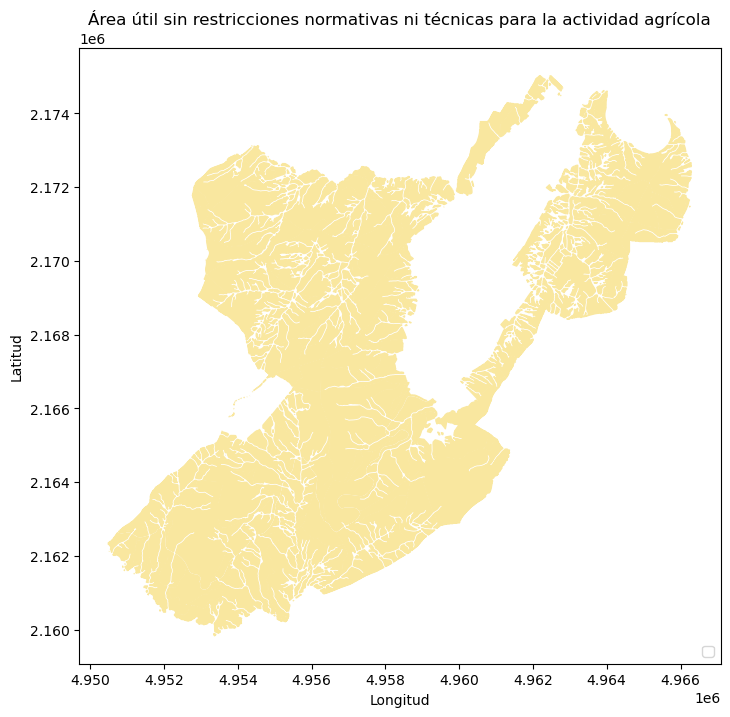

In [21]:
gdf_znUtil_restricciones = gpd.overlay(gdf_znUtil_restricciones, gdf_pendientes, how="difference")

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Plot límite municipal
gdf_znUtil_restricciones.plot(ax=ax, color='#f9e79f', edgecolor='#f9e79f', label='Zona rural')

# Añadir leyenda manualmente con las entradas definidas
ax.legend(loc='lower right')
ax.set_title('Área útil sin restricciones normativas ni técnicas para la actividad agrícola')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

In [ ]:
# Retiramos las columnas innecesarias y agregamos una descripción
gdf_znUtil_restricciones = gdf_znUtil_restricciones.drop(columns = ['OBJECTID',	'MpCodigo',	'MpNombre',	'MpArea',	'MpNorma',	'MpCategor',	'MpAltitud',	'Restriccio',	'Depto',	'Ley617',	'SHAPE_Leng',	'SHAPE_Area'])
gdf_znUtil_restricciones['Descripcion'] = 'Zona útil para la actividad agrícola sin restricciones normativas ni técnicas'

# Guardar la capa vectorial en un archivo shapefile
gdf_znUtil_restricciones.to_file("Zona_Util/Zona_util_sin_restricciones.shp")

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\4175897705.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_znUtil_restricciones.to_file("Zona_Util/Zona_util_sin_restricciones.shp")
C:\Users\Esteban Rojas\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Descripcion' to 'Descripcio'
  ogr_write(


**Validación de condicionantes**

Las limitantes se refieren a las capas que por su condición no restringen la actividad agropecuaria, pero sí la condicionan, por lo que la actividad agrícola requiere de ciertas consideraciones para su desarrollo, como permisos ambientales, el establecimiento de ciertos proyectos productivos, regulaciones, entre otros. Dentro de estos encontramos las reservas forestales productoras, las zonas definidas como de restauración ecológica según el POT, el uso potencial definido en el POT, entre otros.

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\1503091355.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  a.legend()
C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\1503091355.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend()


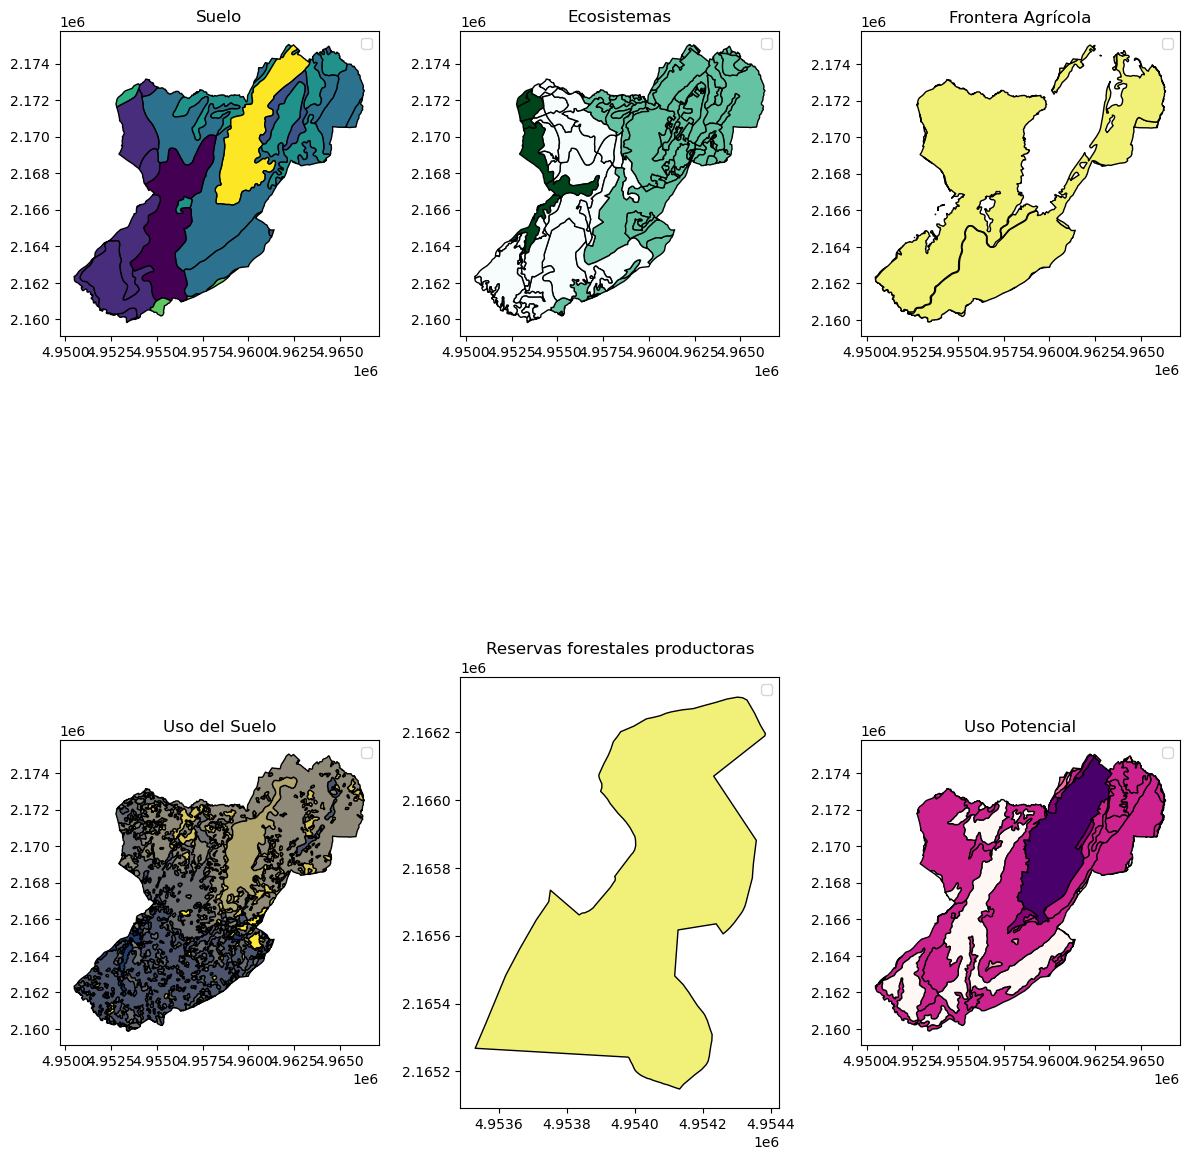

In [91]:
# Capas que permiten identificar condicionantes para la actividad agrícola

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 16))

gdf_suelo.plot(ax=ax[0, 0], cmap='viridis', edgecolor='black', label='Suelo', column='UCS')
gdf_ecosistemas.plot(ax=ax[0, 1], cmap='BuGn', edgecolor='black', label='Ecosistemas', column='BIOMA_IAvH')  
gdf_frontera.plot(ax=ax[0, 2], color='#f1f17a', edgecolor='black', label='Frontera Agrícola')  
gdf_uso.plot(ax=ax[1, 0], cmap='cividis', edgecolor='black', label='Uso del Suelo', column='cobertura')
gdf_reservafp.plot(ax=ax[1, 1], color='#f1f17a', edgecolor='black', label='Reservas forestales productoras')
gdf_uso_potencial.plot(ax=ax[1, 2], cmap='RdPu', edgecolor='black', label='Uso Potencial', column = 'nombre')

titulos = ['Suelo', 'Ecosistemas', 'Frontera Agrícola', 'Uso del Suelo', 'Reservas forestales productoras', 'Uso Potencial']

for a, titulo in zip(ax.flat, titulos):
    a.legend()
    a.set_title(titulo)

plt.tight_layout()
plt.show()


Es importante verificar la información que nos ofrecen dichas capas, pues ello nos permite identificar condicionantes para la actividad agrícola. 

In [64]:
gdf_suelo

UCS  UCS_F                             PAISAJE                    CLIMA  \
0   AHV  AHVe1            Altiplanicie estructural  Muy frío y frío, húmedo   
1   AMH   AMHa            Altiplanicie estructural               Frío, seco   
2    ME     ME               Misceláneo erosionado    Misceláneo erosionado   
3   AMV  AMVd1            Altiplanicie estructural               Frío, seco   
4    ZU     ZU                         Zona urbana              Zona urbana   
5   MHE   MHEg  Montañas estructurales erosionales         Muy frío, húmedo   
6   AMV  AMVf1            Altiplanicie estructural               Frío, seco   
7   AMV  AMVd1            Altiplanicie estructural               Frío, seco   
8   AMH   AMHa            Altiplanicie estructural               Frío, seco   
9    ME     ME               Misceláneo erosionado    Misceláneo erosionado   
10  AHV  AHVd1            Altiplanicie estructural  Muy frío y frío, húmedo   
11   ME     ME               Misceláneo erosionado    Misceláneo erosionado   
12  AMV  AMVe2            Altiplanicie estructural               Frío, seco   
13  AHE   AHEf            Altiplanicie estructural  Muy frío y frío, húmedo   
14  AHV  AHVe1            Altiplanicie estructural  Muy frío y frío, húmedo   
15   ME     ME               Misceláneo erosionado    Misceláneo erosionado   
16  AMH   AMHa            Altiplanicie estructural               Frío, seco   
17  AHV  AHVd1            Altiplanicie estructural  Muy frío y frío, húmedo   
18  MME   MMEf  Montañas estructurales erosionales               Frío, seco   
19  MMA  MMAf1  Montañas estructurales erosionales               Frío, seco   
20  AMV  AMVd1            Altiplanicie estructural               Frío, seco   

                          TIPO_RELIE  \
0                     Lomas y glacís   
1                         Vallecitos   
2              Misceláneo erosionado   
3                     Lomas y glacís   
4                        Zona urbana   
5   Crestas y crestones homoclinales   
6                     Lomas y glacís   
7                     Lomas y glacís   
8                         Vallecitos   
9              Misceláneo erosionado   
10                    Lomas y glacís   
11             Misceláneo erosionado   
12                    Lomas y glacís   
13     Crestas homoclinales abruptas   
14                    Lomas y glacís   
15             Misceláneo erosionado   
16                        Vallecitos   
17                    Lomas y glacís   
18     Crestas homoclinales abruptas   
19    Vigas y crestones homoclinales   
20                    Lomas y glacís   

                                            LITOLOGÍA  \
0   Depósitos superﬁciales piroclásticos de ceniza...   
1             Depósitos superﬁciales clásticos mixtos   
2                               Misceláneo erosionado   
3   Depósitos superﬁciales piroclásticos de ceniza...   
4                                         Zona urbana   
5   Rocas sedimentarias clásticas arenosas con int...   
6   Depósitos superﬁciales piroclásticos de ceniza...   
7   Depósitos superﬁciales piroclásticos de ceniza...   
8             Depósitos superﬁciales clásticos mixtos   
9                               Misceláneo erosionado   
10  Depósitos superﬁciales piroclásticos de ceniza...   
11                              Misceláneo erosionado   
12  Depósitos superﬁciales piroclásticos de ceniza...   
13  Rocas sedimentarias clásticas mixtas parcialme...   
14  Depósitos superﬁciales piroclásticos de ceniza...   
15                              Misceláneo erosionado   
16            Depósitos superﬁciales clásticos mixtos   
17  Depósitos superﬁciales piroclásticos de ceniza...   
18  Rocas sedimentarias clásticas arenosas con int...   
19  Rocas sedimentarias clásticas mixtas y localme...   
20  Depósitos superﬁciales piroclásticos de ceniza...   

                                            CARACTERÍ  \
0   Relieve moderado a fuertemente quebrado y fuer...   
1   Relieve pla

Los paisajes de tipo Misceláneo erosionado son de suelos que presentan dificultades para el óptimo aprovechamiento agrícola, si bien ello no impide el desarrollo de dicha actividad, si es una condicionante, por lo tanto, generaremos ahora una capa con el área más ideal para la producción agrícola.

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\1960973810.py:5: UserWarning: `keep_geom_type=True` in overlay resulted in 822 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_suelo2, how="difference")


Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

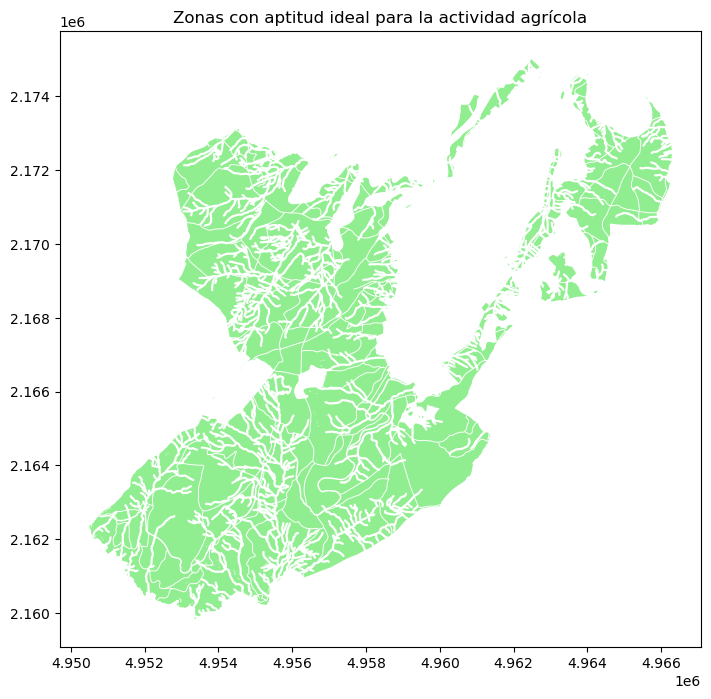

In [65]:
#Subset de las áreas condicionantes para la actividad agrícola
gdf_suelo2 = gdf_suelo[gdf_suelo['PAISAJE'] == 'Misceláneo erosionado']

#Retiramos el área de suelo erosionado
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_suelo2, how="difference")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [66]:
gdf_ecosistemas

OBJECTID TIPO_ECOSI    GRADO_TRAN  \
0      79346  Terrestre       Natural   
1      79408  Terrestre       Natural   
2      79409  Terrestre       Natural   
3      79441  Terrestre       Natural   
4      79445  Terrestre       Natural   
..       ...        ...           ...   
90    200904  Terrestre  Transformado   
91    200946  Terrestre  Transformado   
92    201072  Terrestre  Transformado   
93    201073  Terrestre  Transformado   
94    201353  Terrestre  Transformado   

                                       GRAN_BIOMA              BIOMA_PREL  \
0   Orobioma Azonal del Zonobioma Humedo Tropical  Orobioma Azonal Andino   
1   Orobioma Azonal del Zonobioma Humedo Tropical  Orobioma Azonal Andino   
2   Orobioma Azonal del Zonobioma Humedo Tropical  Orobioma Azonal Andino   
3   Orobioma Azonal del Zonobioma Humedo Tropical  Orobioma Azonal Andino   
4   Orobioma Azonal del Zonobioma Humedo Tropical  Orobioma Azonal Andino   
..                                            ...                     ...   
90         Orobioma del Zonobioma Humedo Tropical      Orobioma de Paramo   
91         Orobioma del Zonobioma Humedo Tropical      Orobioma de Paramo   
92         Orobioma del Zonobioma Humedo Tropical      Orobioma de Paramo   
93         Orobioma del Zonobioma Humedo Tropical      Orobioma de Paramo   
94         Orobioma del Zonobioma Humedo Tropical      Orobioma de Paramo   

                                           BIOMA_IAvH      ECOS_SINTE  \
0   Orobioma Azonal Andino Altoandino cordillera o...    Subxerofitia   
1   Orobioma Azonal Andino Altoandino cordillera o...    Subxerofitia   
2   Orobioma Azonal Andino Altoandino cordillera o...    Subxerofitia   
3   Orobioma Azonal Andino Altoandino cordillera o...    Subxerofitia   
4   Orobioma Azonal Andino Altoandino cordillera o...    Subxerofitia   
..                                                ...             ...   
90  Orobioma de Paramo Altoandino cordillera oriental  Agroecosistema   
91  Orobioma de Paramo Altoandino cordillera oriental  Agroecosistema   
92  Orobioma de Paramo Altoandino cordillera oriental  Agroecosistema   
93  Orobioma de Paramo Altoandino cordillera oriental  Agroecosistema   
94  Orobioma de Paramo Altoandino cordillera oriental  Agroecosistema   

                                           ECOS_GENER  \
0                                 Subxerofitia andina   
1                                 Subxerofitia andina   
2                                 Subxerofitia andina   
3                                 Subxerofitia andina   
4                                 Subxerofitia andina   
..                                                ...   
90     Agroecosistema de mosaico de cultivos y pastos   
91     Agroecosistema de mosaico de cultivos y pastos   
92     Agroecosistema de mosaico de cultivos y pastos   
93     Agroecosistema de mosaico de cultivos y pastos   
94  Agroecosistema de mosaico de cultivos, pastos ...   

                                           UNIDAD_SIN AMBIENTE_A  ...  \
0   Subxerofitia andina de Arbustal denso en Misce...       N.A.  ...   
1   Subxerofitia andina de Areas abiertas sin vege...       N.A.  ...   
2   Subxerofitia andina de Areas abiertas sin vege...       N.A.  ...   
3   Subxerofitia andina de Areas abiertas sin vege...       N.A.  ...   
4   Subxerofitia andina de Areas abiertas sin vege...       N.A.  ...   
..                                                ...        ...  ...   
90  Agroecosistema de mosaico de cultivos y pastos...       N.A.  ...   
91  Agroecosistema de mosaico de cultivos y pastos...       N.A.  ...   
92  Agroecosistema de mosaico de cultivos y pastos...       N.A.  ...   
93  Agroecosistema de mosaico de cultivos y pastos...       N.A.  ...   
94  Agroecosistema de mosaico de cultivos, pastos ...       N.A.  ...   

                              REPTILES No_Anfibio No_Aves No_Magnoli  \
0   bi-bm-bn-bo-bq-br-bz-cb-ce-cg-co-l       11.0    13.0       14.0   
1  

Para esta capa en particular, es relevante retirar las zonas que correpsonden a Páramo, pues a pesar de que quizás no se hayan delimitado en las zonas protegidas, pueden representar dificultades por el uso del suelo.

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\1963209388.py:5: UserWarning: `keep_geom_type=True` in overlay resulted in 865 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_ecosistemas2, how="difference")


Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

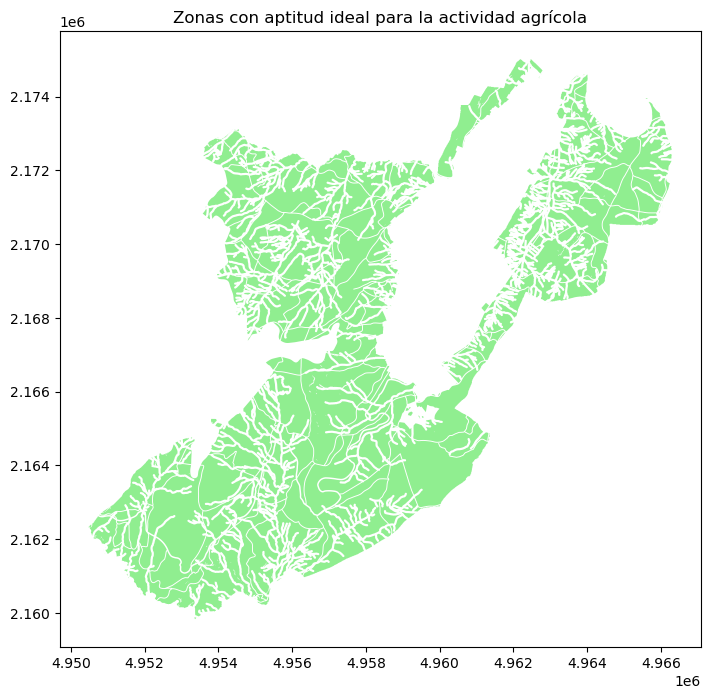

In [ ]:
#Subset de las áreas condicionantes para la actividad agrícola
gdf_ecosistemas2 = gdf_ecosistemas[gdf_ecosistemas['BIOMA_IAvH'] == 'Orobioma de Paramo Altoandino cordillera oriental']

#Retiramos el área de ecosistemas de páramo
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_ecosistemas2, how="difference")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [68]:
gdf_frontera

municipio departamen cod_depart cod_dane_m                    elemento  \
0   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
1   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
2         Soracá     Boyacá         15      15764  Frontera agrícola nacional   
3         Boyacá     Boyacá         15      15104  Frontera agrícola nacional   
4   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
5   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
6   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
7   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
8         Boyacá     Boyacá         15      15104  Frontera agrícola nacional   
9   Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
10        Samacá     Boyacá         15      15646  Frontera agrícola nacional   
11  Ventaquemada     Boyacá         15      15861  Frontera agrícola nacional   
12        Boyacá     Boyacá         15      15104  Frontera agrícola nacional   
13        Boyacá     Boyacá         15      15104  Frontera agrícola nacional   
14         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
15         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
16         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
17         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
18         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
19         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
20         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
21         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
22         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
23         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
24         Tunja     Boyacá         15      15001  Frontera agrícola nacional   
25        Oicatá     Boyacá         15      15500  Frontera agrícola nacional   
26       Chivatá     Boyacá         15      15187  Frontera agrícola nacional   
27        Oicatá     Boyacá         15      15500  Frontera agrícola nacional   
28       Cucaita     Boyacá         15      15224  Frontera agrícola nacional   
29          Sora     Boyacá         15      15762  Frontera agrícola nacional   
30      Motavita     Boyacá         15      15476  Frontera agrícola nacional   
31       Cómbita     Boyacá         15      15204  Frontera agrícola nacional   

         area_ha  consecutiv     shape_Leng    shape_Area  \
0    4997.046572       79000  127283.998806  4.997047e+07   
1    4581.006136       79003  458281.119829  4.581006e+07   
2    5551.508863       70476   41943.168974  5.551509e+07   
3    4395.303961        9997   79166.133702  4.395304e+07   
4       0.034715       78995     249.084255  3.471539e+02   
5       0.001476       78996      38.619359  1.475877e+01   
6       0.000128       78997      10.549710  1.277240e+00   
7       0.018746       78998     112.563559  1.874614e+02   
8       0.037083        9994     322.453771  3.708298e+02   
9       0.001247       79001      32.337438  1.247053e+01   
10   9562.470080       58872  172254.639860  9.562470e+07   
11      0.021933       79002      70.168292  2.193305e+02   
12      0.005263        9995     165.240802  5.263253e+01   
13      0.000444        9996      25.746593  4.435800e+00   
14      0.039462       76257     119.730734  3.946171e+02   
15    112.171283       76261    6476.149200  1.121713e+06   
16      0.189584       76258     265.357289  1.895837e+03   
17      0.077390       76259     219.033043  7.739033e+02   
18      0.108994       76260     265.784961  1.089937e+03   
19   4943.421571       76262   61357.930120  4.943422e+07   
20   3717.003311       76265   71168.337840  3.71700

La frontera agrícola, nos permite evidenciar aquellas zonas en las que se produce, por lo que una vez retiras las zonas de restricción, hcer un cruce con esta capa es útil para contar con áreas que son productivas.

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\3505835823.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 63 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_frontera, how="intersection")


Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

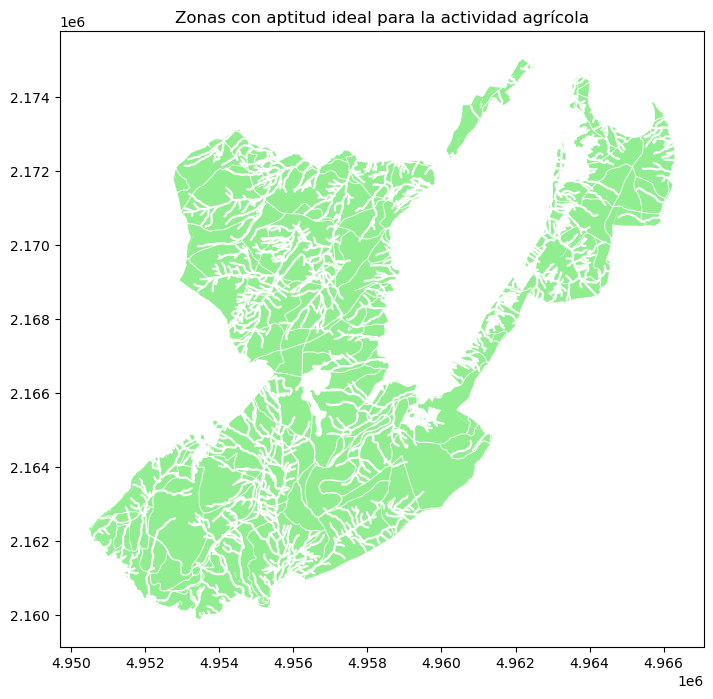

In [ ]:
#Adicionamos el área de suelo cultivado
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_frontera, how="intersection")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [75]:
gdf_uso['cobertura'].unique()

array(['ARBUSTOS Y MATORRALES', 'BOSQUE NATURAL FRAGMENTADO', 'PASTOS',
       'CULTIVOS', 'TIERRAS DESNUDAS O DEGRADADAS', 'PASTOS LIMPIOS',
       'TEJIDO URBANO DISCONTINUO', 'VEGETACION DE PARAMO Y SUBPARAMO'],
      dtype=object)

Explorando la capa previa identificamos valores de BOSQUE NATURAL FRAGMENTADO, elementos que no necesariamente son improductivos, sin embargo, para la actividad agrícola pueden representar condicionantes, por lo que es relevante retirar estas zonas del ejercicio 

Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

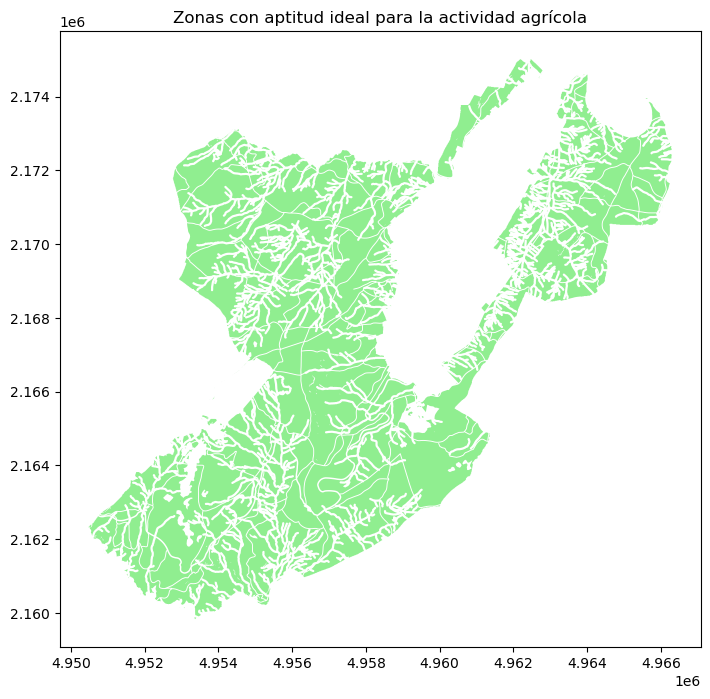

In [ ]:
#Subset de las áreas condicionantes para la actividad agrícola
gdf_uso2 = gdf_uso[gdf_uso['cobertura'] == 'BOSQUE NATURAL FRAGMENTADO']

#Retiramos el área de bosque natural fragmentado
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_uso2, how="difference")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [81]:
gdf_reservafp

cod_categ  objeto  garf  region     orden     categoria   jurisdicci  \
0     RFP *    7311  5110  ANDINA  NACIONAL  RFP El Malmo  CORPOBOYACA   

        nmg   area_mt2  area_has  cod_anp  \
0  El Malmo  510162.35     51.02      103   

                                            geometry  
0  POLYGON ((4954312.163 2165667.724, 4954292.757...

Esta reserva es de tipo productora lo que la hace una zona productiva, sin embargo, puede representar condicionantes para la actividad agrícola por lo que es importante retirar esta zona de nuestra capa ideal.

Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

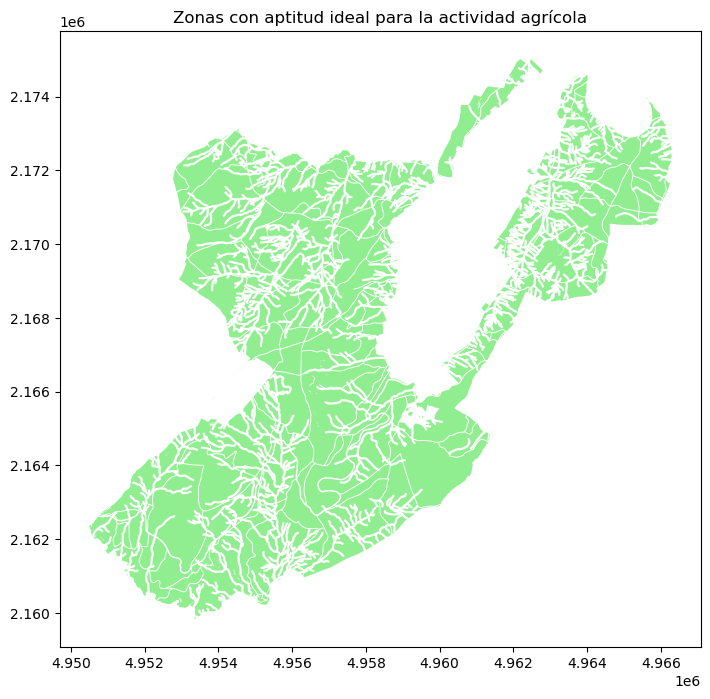

In [82]:
#Retiramos el área de suelo erosionado
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_reservafp, how="difference")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [83]:
gdf_uso_potencial

objectid_1        nombre cod_sub_up  id_pol_pot cod_munici cod_gru_up  \
0           26      AGRICOLA       AGSL        26.0      15646         AG   
1           65    PROTECCION         RC        65.0      15001          P   
2           66    PROTECCION         CS        66.0      15001          P   
3          120      FORESTAL        FPR       120.0      15476          F   
4          131      AGRICOLA       AGSL       131.0      15224         AG   
..         ...           ...        ...         ...        ...        ...   
92        4655  AGROFORESTAL        SPA      4655.0      15187        AGF   
93        4833  AGROPECUARIO        AGP      4833.0      15187        AGR   
94        7080    PROTECCION         RC      7080.0      15001          P   
95        7081    PROTECCION         RC      7081.0      15001          P   
96        7082    PROTECCION         RC      7082.0      15001          P   

   tip_uso            nom_sub_up cod_eot  \
0        R  CULTIVOS SEMILIMPIOS     ASM   
1        R          RECUPERACION       R   
2        R          CONSERVACION      PC   
3        R      BOSQUE PROTECTOR      BP   
4        R  CULTIVOS SEMILIMPIOS      C3   
..     ...                   ...     ...   
92       R         SILVOPASTORIL    F2-P   
93       R   AGRICOLA Y PECUARIO       P   
94       R          RECUPERACION       R   
95       R          RECUPERACION       R   
96       R          RECUPERACION      R1   

                                              nom_eot      area_ha  mark  \
0                     Zona agropecuaria semiintensiva  1950.975852  None   
1                  Tierras para recuperacion moderada   809.056611  None   
2              Tierras para proteccion y conservacion   499.207016  None   
3                                    Bosque protector   125.415751  None   
4            Formado por suelos fuertemente ondulados   612.642648  None   
..                                                ...          ...   ...   
92  Tierra para pastos naturales y bosques product...    80.709424  None   
93                                Tierras para pastos    10.035386  None   
94                 Tierras para recuperacion moderada     0.000003  None   
95                 Tierras para recuperacion moderada  2469.145474  None   
96     Tierras para recuperacion moderada a intensiva   204.416333  None   

                                             geometry  
0   POLYGON ((4950721.053 2162576.939, 4950708.269...  
1   POLYGON ((4955737.771 2161716.622, 4955733.396...  
2   POLYGON ((4955452.399 2167033.268, 4955454.921...  
3   MULTIPOLYGON (((4959804.631 2172048.443, 49598...  
4   MULTIPOLYGON (((4954228.967 2167801.571, 49542...  
..                                                ...  
92  MULTIPOLYGON (((4966114.894 2173336.439, 49661...  
93  MULTIPOLYGON (((4965898.303 2170560.499, 49658...  
94  POLYGON ((4958147.175 2165573.646, 4958147.211...  
95  POLYGON ((4965723.632 2173838.187, 4965738.817...  
96  POLYGON ((4964164.058 2174655.399, 4964160.433...  

[97 rows x 13 columns]

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\3364813312.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 837 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_uso_potencial2, how="difference")


Text(0.5, 1.0, 'Zonas con aptitud ideal para la actividad agrícola')

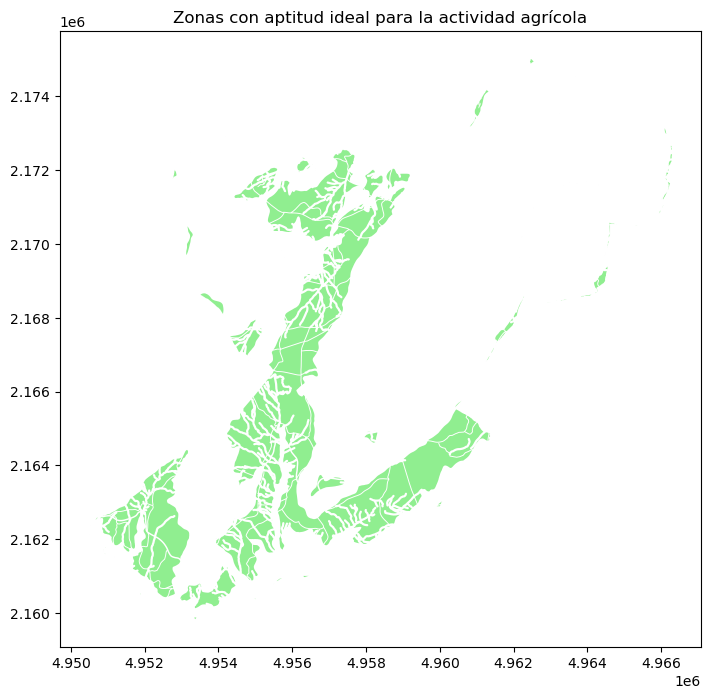

In [ ]:
#Subset de las áreas condicionantes para la actividad agrícola
gdf_uso_potencial2 = gdf_uso_potencial[
    (gdf_uso_potencial['nombre'] == 'AGRICOLA') & (gdf_uso_potencial['nombre'] == 'AGROPECUARIO')
]

#Retiramos el área de bosque natural fragmentado
gdf_ZnAptitud_Ideal = gpd.overlay(gdf_znUtil_restricciones, gdf_uso_potencial2, how="")

#Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

gdf_ZnAptitud_Ideal.plot(ax = ax, color='lightgreen', label='Zonas con aptitud ideal para la actividad agrícola')
ax.set_title('Zonas con aptitud ideal para la actividad agrícola')

In [108]:
gdf_ZnAptitud_Ideal['Descripcion'] = 'Zona con aptitud ideal para la actividad agrícola'

gdf_ZnAptitud_Ideal.to_file("Zona_Util/Zona_util_ideal_agricola.shp")

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\2509356988.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_ZnAptitud_Ideal.to_file("Zona_Util/Zona_util_ideal_agricola.shp")
C:\Users\Esteban Rojas\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Descripcion' to 'Descripcio'
  ogr_write(


Teniendo las dos capas de interés, ahora construiremos el mapa de aptitud general para el municipio de Tunja uniendo las capas y llenando los espacios vacíos como zonas no aptas.

In [151]:
#Crear el geodataframe de aptitud general restando las zonas de aptitud ideal y zonas no aptas
gdf_Aptitud_General = gpd.overlay(gdf_znUtil_restricciones, gdf_ZnAptitud_Ideal, how="difference")

#Combinamos la aptitud ideal con la general
gdf_Aptitud_General = pd.concat([gdf_ZnAptitud_Ideal, gdf_Aptitud_General], ignore_index=True)

#Preparamos el polígono de la zona no apta con base en el límite municipal
gdf_zn_NoAptas = gpd.overlay(gdf_limite, gdf_Aptitud_General,how="difference")
gdf_zn_NoAptas = gdf_zn_NoAptas.drop(columns = ['OBJECTID',	'MpCodigo',	'MpNombre',	'MpArea',	'MpNorma',	'MpCategor',	'MpAltitud',	'Restriccio',	'Depto',	'Ley617',	'SHAPE_Leng',	'SHAPE_Area'])
gdf_zn_NoAptas['Descripcion'] = 'Zonas no aptas para la actividad agrícola'
gdf_zn_NoAptas.to_file("Zona_Util/Zona_no_aptas_agricola.shp")

#Combinamos la aptitud general con la no apta
gdf_Aptitud_General = pd.concat([gdf_Aptitud_General, gdf_zn_NoAptas], ignore_index=True)

#Calculamos las áreas de cada polígono
gdf_Aptitud_General['Área'] = gdf_Aptitud_General.geometry.area/10000

#Guardamos el geodataframe en un archivo shapefile
gdf_Aptitud_General.to_file("Zona_Util/Aptitud_Agrícola_Tunja.shp")

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\2913048094.py:2: UserWarning:

`keep_geom_type=True` in overlay resulted in 846 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\2913048094.py:11: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

C:\Users\Esteban Rojas\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:723: RuntimeWarning:

Normalized/laundered field name: 'Descripcion' to 'Descripcio'

C:\Users\Esteban Rojas\AppData\Local\Temp\ipykernel_20456\2913048094.py:20: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

C:\Users\Esteban Rojas\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:723: RuntimeWarning:

Normalized/laundered field name: 'Descripcion' to 'Descripcio'



In [153]:
gdf_Aptitud_General

geometry  \
0  MULTIPOLYGON Z (((4951889.19 2160532.297 0, 49...   
1  MULTIPOLYGON Z (((4953733.631 2160199.576 0, 4...   
2  MULTIPOLYGON Z (((4962281.114 2174992 0, 49623...   

                                         Descripcion         Área  
0  Zona con aptitud ideal para la actividad agrícola  2136.096048  
1  Zona útil para la actividad agrícola sin restr...  4592.454050  
2          Zonas no aptas para la actividad agrícola  5223.296003

El resultado del procesamiento realizado se condensa en el siguiente mapa:

<Axes: title={'center': 'Mapa de aptitud agrícola en Tunja'}>

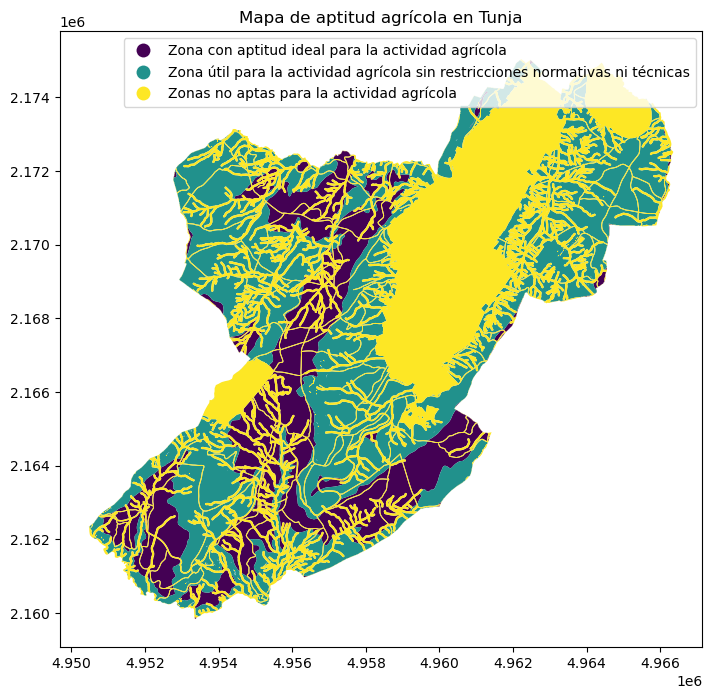

In [167]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Mapa de aptitud agrícola en Tunja')

gdf_Aptitud_General.plot(
    column="Descripcion",
    cmap='viridis',
    ax=ax,
    legend=True
)


Para aprovechar y optimizar el funcionamiento del geoprocesamiento realizado, crearemos una herramienta la cual realice la consulta de la aptitud por predio. A continuación, se presenta la misma.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import argparse

def main():
    # Configuración de argumentos
    parser = argparse.ArgumentParser(
        description='Validación y generación de aptitud para predios en Tunja'
    )
    parser.add_argument('--predio', required=True, help='Ruta del shapefile del predio')
    parser.add_argument('--aptitudes', required=True, help='Ruta del shapefile de aptitudes de Tunja')
    parser.add_argument('--output_shp', required=True, help='Ruta de salida para el nuevo shapefile')
    parser.add_argument('--output_png', required=True, help='Ruta de salida para el archivo PNG')
    args = parser.parse_args()

    # Carga de los shapefiles
    gdf_aptitudes = gpd.read_file(args.aptitudes)
    gdf_predio = gpd.read_file(args.predio)

    # Asegurarse de que ambos tengan el mismo CRS
    if gdf_aptitudes.crs != gdf_predio.crs:
        gdf_predio = gdf_predio.to_crs(gdf_aptitudes.crs)

    # Validación: verificar si el predio se encuentra dentro del área de aptitudes
    # Se crea una unión de todas las geometrías de aptitudes
    aptitudes_union = gdf_aptitudes.unary_union

    # Usamos 'within' para verificar si el predio está totalmente contenido
    if not gdf_predio.geometry.iloc[0].within(aptitudes_union):
        print("El predio no se encuentra dentro del área de aptitudes de Tunja.")
        return

    # Calcular la intersección entre el predio y el área de aptitudes
    interseccion = gpd.overlay(gdf_predio, gdf_aptitudes, how='intersection')

    if interseccion.empty:
        print("No se encontró intersección entre el predio y el área de aptitudes.")
        return

    # Exportar el shapefile resultante
    interseccion.to_file(args.output_shp)
    print(f"Nuevo shapefile guardado en: {args.output_shp}")

    # Generar y guardar el mapa en PNG
    fig, ax = plt.subplots(figsize=(10, 10))
    interseccion.plot(ax=ax, cmap='viridis', alpha=0.5, label='Intersección', column='Descripcio', legend=True)
    #plt.legend()
    plt.title("Intersección entre el predio y aptitudes de Tunja")
    plt.savefig(args.output_png)
    plt.close()
    print(f"Mapa PNG guardado en: {args.output_png}")

    # Calcular el área de la intersección (asegúrate de que el CRS sea proyectado, p.ej. metros)
    interseccion['area'] = interseccion.area
    total_area = interseccion['area'].sum()

    # Mostrar en la línea de comandos la tabla de áreas
    print("Tabla de áreas de aptitud para el predio:")
    print(interseccion[['area']])
    print(f"Área total de aptitud en el predio: {total_area:.2f} (unidades del CRS)")

if __name__ == '__main__':
    main()


Los resultados obtenidos del análisis espacial permitieron identificar y cartografiar las áreas rurales del municipio de Tunja que presentan las condiciones favorables y viables para la producción agrícola, esto se logró con el uso de librerías como geopandas y folium, que facilitó la visualización de las áreas aptas mediante mapas interactivos y estáticos. El análisis reveló que aproximadamente el 56.30% del área rural de Tunja es viable para la producción agrícola.
